# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Packages

In [ ]:
!pip install scikit-multilearn
!pip install transformers
!pip install tensorflow-addons
!pip install keras-tqdm

     |████████████████████████████████| 89 kB 4.0 MB/s 
     |████████████████████████████████| 2.6 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 48.3 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 636 kB 57.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tqdm import tqdm_notebook

from sklearn.metrics import classification_report

BASE_PATH = '/content/drive/MyDrive/Ciência de Dados/Projeto Final'
DATASETS_PATH = BASE_PATH + "/Resources/Datasets"

In [ ]:
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.37.167.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.37.167.2:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados de Teste

## LSTM

In [ ]:
lstm_toxic_test_data = pd.read_json(DATASETS_PATH + '/Wikipedia Toxic Comments/lstm_padded_test_data.json')
lstm_md_gender_test_data =  pd.read_json(DATASETS_PATH + '/MDGender/md_gender_bias/new_data/lstm_padded_test_data.json')
lstm_convai2_test_data = pd.read_json(DATASETS_PATH + '/MDGender/md_gender_bias/convai2_inferred/lstm_padded_test_data.json')
lstm_light_test_data = pd.read_json(DATASETS_PATH + '/MDGender/md_gender_bias/light_inferred/lstm_padded_test_data.json')

len(lstm_toxic_test_data), len(lstm_md_gender_test_data), len(lstm_convai2_test_data), len(lstm_light_test_data)

(3238, 459, 10000, 10000)

In [ ]:
lstm_toxic_test_data.head()

,tokens_ids,y
0,"[5121, 3605, 33791, 4966, 12647, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1]"
1,"[527, 1529, 0, 404038, 2498, 9782, 23793, 0, 0...","[1, 1, 1, 1, 1, 1]"
2,"[2006, 0, 19844, 407, 3323, 32917, 38195, 653,...","[1, 1, 1, 1, 1, 1]"
3,"[10489, 19844, 2994, 93403, 1045, 80506, 3425,...","[1, 1, 1, 1, 1, 1]"
4,"[10489, 2372, 3323, 176703, 93193, 0, 0, 0, 0,...","[1, 1, 1, 1, 1, 1]"


## BERT

In [ ]:
bert_toxic_test_data = pd.read_json(DATASETS_PATH + '/Wikipedia Toxic Comments/padded_test_data.json')
bert_md_gender_test_data =  pd.read_json(DATASETS_PATH + '/MDGender/md_gender_bias/new_data/padded_test_data.json')
bert_convai2_test_data = pd.read_json(DATASETS_PATH + '/MDGender/md_gender_bias/convai2_inferred/padded_test_data.json')
bert_light_test_data = pd.read_json(DATASETS_PATH + '/MDGender/md_gender_bias/light_inferred/padded_test_data.json')

len(bert_toxic_test_data), len(bert_md_gender_test_data), len(bert_convai2_test_data), len(bert_light_test_data)

(3238, 459, 10000, 10000)

In [ ]:
bert_toxic_test_data.head()

,tokens_ids,masked_ids,y
0,"[101, 3844, 2039, 2017, 6638, 13433, 7361, 203...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1]"
1,"[101, 1045, 2572, 2183, 2000, 4028, 1062, 5714...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1]"
2,"[101, 1057, 2388, 11263, 24103, 2078, 7743, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1]"
3,"[101, 2175, 6616, 4426, 7743, 1045, 5223, 2115...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1]"
4,"[101, 2061, 6616, 2125, 1998, 3280, 9040, 5470...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1]"


# Carregando os Modelos

In [ ]:
toxic_labels = ['toxic', 'severe_toxic',	'obscene', 'threat', 'insult', 'identity_hate']
binary_labels = ['female', 'male']
ternary_labels = ['female', 'male', 'neutral']

auc_score = AUC(multi_label=True)

## LSTM

In [ ]:
# Leitura das word embeddings pré-treinadas
FASTTEXT = {}
f = open(BASE_PATH + '/Resources/FastText Word Embeddings/wiki-news-300d-1M.vec', encoding='utf8')
index = 1

for line in f:
  values = line.split()
  word = values[0]
  FASTTEXT[word] = (index, np.asarray(values[1:], dtype='float32'))
  index += 1
f.close()

print('Quantidade de word embeddings = {}'.format(len(FASTTEXT.keys())))

Quantidade de word embeddings = 999995


In [ ]:
embedding_dim = 300
embedding_matrix = np.random.random((len(FASTTEXT.keys()) + 1, embedding_dim))

with tqdm_notebook(total=len(FASTTEXT.items())) as pbar:
  for word in FASTTEXT.keys():
      embedding_tuple = FASTTEXT.get(word)
      if embedding_tuple is not None:
          embedding_matrix[embedding_tuple[0]] = embedding_tuple[1]
      pbar.update(1)
  pbar.close()

  0%|          | 0/999995 [00:00<?, ?it/s]

In [ ]:
print('Loading LSTM model for Wikipedia Toxic Comments...')
toxic_lstm_model = model.lstm_classifier(source_length=text.MAX_LENGTH,
                                         hidden_units=252,
                                         labels_size=len(toxic_labels),
                                         metric=auc_score,
                                         vocab_size=len(FASTTEXT.keys()) + 1,
                                         embedding_dim=embedding_dim,
                                         embedding_matrix=embedding_matrix)
toxic_lstm_model.load_weights(BASE_PATH + '/Resources/Models/best_lstm_classifier_toxic_comments.h5')

print('Loading LSTM model for MDGender...')
md_gender_lstm_model = model.lstm_classifier(source_length=text.MAX_LENGTH,
                                             hidden_units=128,
                                             labels_size=len(binary_labels),
                                             metric=auc_score,
                                             vocab_size=len(FASTTEXT.keys()) + 1,
                                             embedding_dim=embedding_dim,
                                             embedding_matrix=embedding_matrix)
md_gender_lstm_model.load_weights(BASE_PATH + '/Resources/Models/best_lstm_classifier_md_gender.h5')

print('Loading LSTM model for ConvAI2...')
convai2_lstm_model = model.lstm_classifier(source_length=text.MAX_LENGTH,
                                           hidden_units=128,
                                           labels_size=len(ternary_labels),
                                           metric=auc_score,
                                           vocab_size=len(FASTTEXT.keys()) + 1,
                                           embedding_dim=embedding_dim,
                                           embedding_matrix=embedding_matrix)
convai2_lstm_model.load_weights(BASE_PATH + '/Resources/Models/best_lstm_classifier_convai2.h5')

print('Loading LSTM model for LIGHT...')
light_lstm_model = model.lstm_classifier(source_length=text.MAX_LENGTH,
                                         hidden_units=128,
                                         labels_size=len(ternary_labels),
                                         metric=auc_score,
                                         vocab_size=len(FASTTEXT.keys()) + 1,
                                         embedding_dim=embedding_dim,
                                         embedding_matrix=embedding_matrix)
light_lstm_model.load_weights(BASE_PATH + '/Resources/Models/best_lstm_classifier_light.h5')

Loading LSTM model for Wikipedia Toxic Comments...
Loading LSTM model for MDGender...
Loading LSTM model for ConvAI2...
Loading LSTM model for LIGHT...


## BERT

In [ ]:
print('Loading BERT model for Wikipedia Toxic Comments...')
toxic_bert_model = model.bert_linear_classifier2(source_length=text.MAX_LENGTH,
                                                 hidden_units=252,
                                                 labels_size=len(toxic_labels),
                                                 metric=auc_score)
toxic_bert_model.load_weights(BASE_PATH + '/Resources/Models/best_bert_linear_classifier2_toxic_comments.h5')

print('Loading BERT model for MDGender...')
md_gender_bert_model = model.bert_linear_classifier2(source_length=text.MAX_LENGTH,
                                                     hidden_units=128,
                                                     labels_size=len(binary_labels),  
                                                     metric=auc_score)
md_gender_bert_model.load_weights(BASE_PATH + '/Resources/Models/best_bert_linear_classifier2_md_gender.h5')

print('Loading BERT model for ConvAI2...')
convai2_bert_model = model.bert_linear_classifier2(source_length=text.MAX_LENGTH,
                                                  hidden_units=128,
                                                  labels_size=len(ternary_labels),
                                                  metric=auc_score)
convai2_bert_model.load_weights(BASE_PATH + '/Resources/Models/best_bert_linear_classifier2_convai2.h5')

print('Loading BERT model for LIGHT...')
light_bert_model = model.bert_linear_classifier2(source_length=text.MAX_LENGTH,
                                                 hidden_units=128,
                                                 labels_size=len(ternary_labels),
                                                 metric=auc_score)
light_bert_model.load_weights(BASE_PATH + '/Resources/Models/best_bert_linear_classifier2_light.h5')

Loading BERT model for Wikipedia Toxic Comments...


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Loading BERT model for MDGender...


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading BERT model for ConvAI2...


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading BERT model for LIGHT...


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Avaliação Geral



## Realizando as Predições

### LSTM

In [ ]:
X_test_toxic_lstm = np.array(lstm_toxic_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')
X_test_md_gender_lstm  = np.array(lstm_md_gender_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')
X_test_convai2_lstm  = np.array(lstm_convai2_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')
X_test_light_lstm  = np.array(lstm_light_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')

y_test_toxic_lstm = np.array(lstm_toxic_test_data['y'].to_numpy().tolist(), dtype='float32')
y_test_md_gender_lstm = np.array(lstm_md_gender_test_data['y'].to_numpy().tolist(), dtype='float32')
y_test_convai2_lstm = np.array(lstm_convai2_test_data['y'].to_numpy().tolist(), dtype='float32')
y_test_light_lstm = np.array(lstm_light_test_data['y'].to_numpy().tolist(), dtype='float32')

In [ ]:
y_pred_lstm_toxic = np.rint(toxic_lstm_model.predict(X_test_toxic_lstm))
y_pred_lstm_md_gender = model.label_encoder(model.label_decoder(md_gender_lstm_model.predict(X_test_md_gender_lstm)))
y_pred_lstm_convai2 = model.label_encoder(model.label_decoder(convai2_lstm_model.predict(X_test_convai2_lstm)))
y_pred_lstm_light = model.label_encoder(model.label_decoder(light_lstm_model.predict(X_test_light_lstm)))

### BERT

In [ ]:
X_test_ids_toxic = np.array(bert_toxic_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')
X_test_ids_md_gender = np.array(bert_md_gender_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')
X_test_ids_convai2 = np.array(bert_convai2_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')
X_test_ids_light = np.array(bert_light_test_data['tokens_ids'].to_numpy().tolist(), dtype='float32')

X_test_masks_toxic = np.array(bert_toxic_test_data['masked_ids'].to_numpy().tolist(), dtype='float32')
X_test_masks_md_gender = np.array(bert_md_gender_test_data['masked_ids'].to_numpy().tolist(), dtype='float32')
X_test_masks_convai2 = np.array(bert_convai2_test_data['masked_ids'].to_numpy().tolist(), dtype='float32')
X_test_masks_light = np.array(bert_light_test_data['masked_ids'].to_numpy().tolist(), dtype='float32')

y_test_toxic = np.array(bert_toxic_test_data['y'].to_numpy().tolist(), dtype='float32')
y_test_md_gender = np.array(bert_md_gender_test_data['y'].to_numpy().tolist(), dtype='float32')
y_test_convai2 = np.array(bert_convai2_test_data['y'].to_numpy().tolist(), dtype='float32')
y_test_light = np.array(bert_light_test_data['y'].to_numpy().tolist(), dtype='float32')

In [ ]:
y_pred_bert_toxic = np.rint(toxic_bert_model.predict([X_test_ids_toxic, X_test_masks_toxic]))
y_pred_bert_md_gender = model.label_encoder(model.label_decoder(md_gender_bert_model.predict([X_test_ids_md_gender, X_test_masks_md_gender])))
y_pred_bert_convai2 = model.label_encoder(model.label_decoder(convai2_bert_model.predict([X_test_ids_convai2, X_test_masks_convai2])))
y_pred_bert_light = model.label_encoder(model.label_decoder(light_bert_model.predict([X_test_ids_light, X_test_masks_light])))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=float32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=float32>]


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=float32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=float32>]


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=float32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=float32>]


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=float32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=float32>]


## Matrizes de Confusão

### *Wikipedia Toxic Comments*

In [ ]:
idx2toxic = {index: label for index, label in enumerate(toxic_labels)}

y_test_bert_toxic_coded = model.change_target_codification(y_test_toxic, idx2toxic, is_safe=True)
y_pred_bert_toxic_coded = model.change_target_codification(y_pred_bert_toxic, idx2toxic, is_safe=True)

y_test_lstm_toxic_coded = model.change_target_codification(y_test_toxic_lstm, idx2toxic, is_safe=True)
y_pred_lstm_toxic_coded = model.change_target_codification(y_pred_lstm_toxic, idx2toxic, is_safe=True)

(len(y_test_bert_toxic_coded), len(y_test_lstm_toxic_coded)), (len(y_pred_bert_toxic_coded), len(y_pred_lstm_toxic_coded))

((19428, 19428), (19428, 19428))

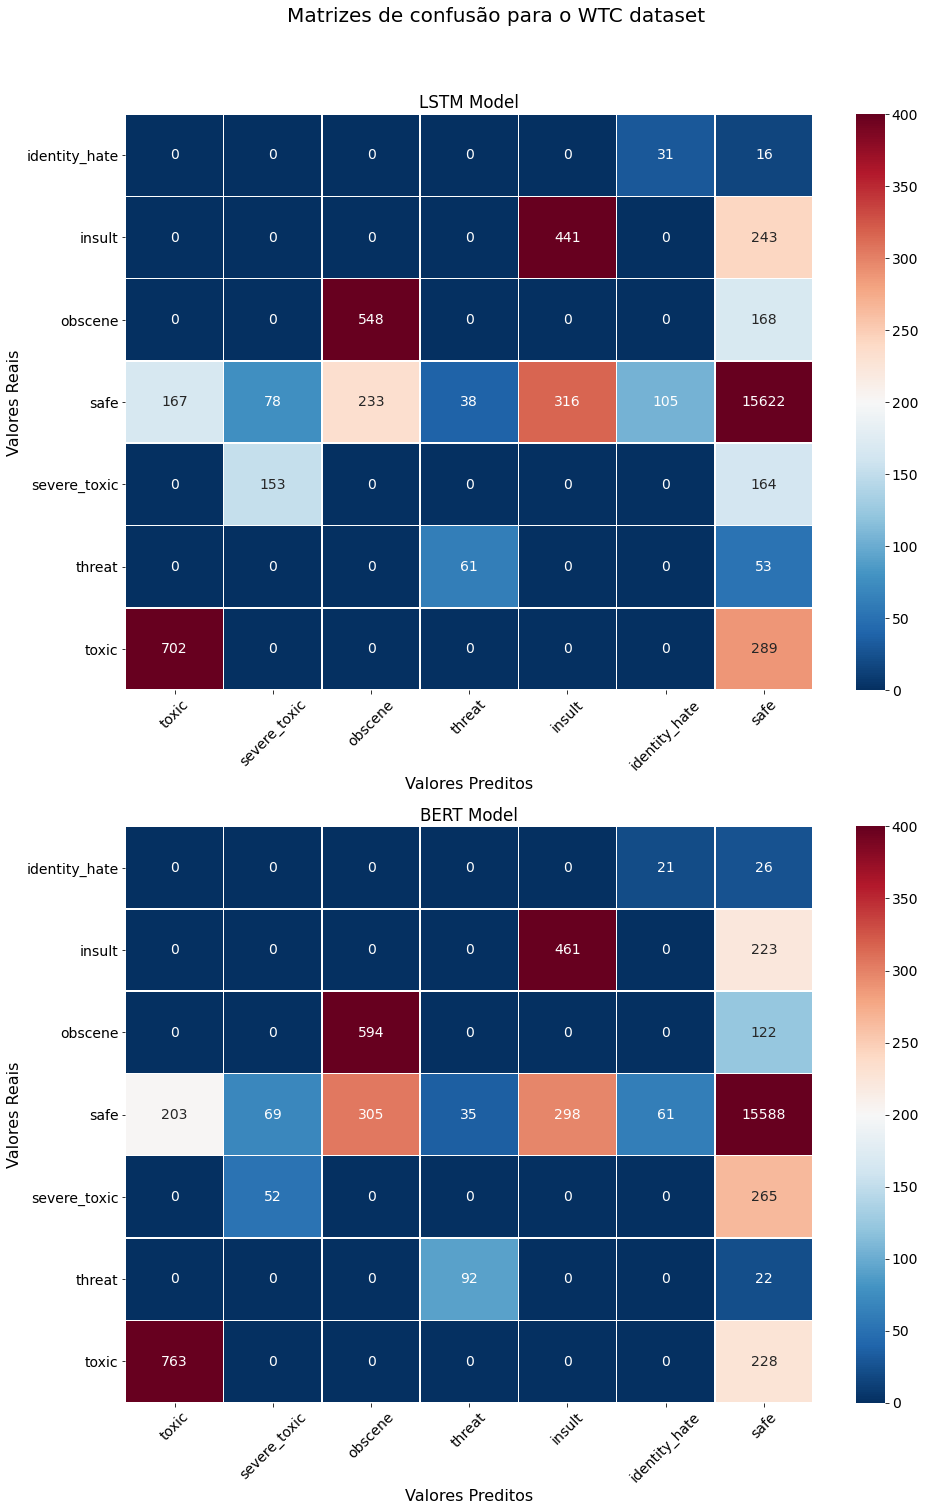

In [ ]:
utils.plot_grid_multilabel_confusion_matrixes(y_true_list=[y_test_lstm_toxic_coded, y_test_bert_toxic_coded],
                                              y_pred_list=[y_pred_lstm_toxic_coded, y_pred_bert_toxic_coded],
                                              nrows=2,
                                              ncols=1,
                                              figsize=(14, 20),
                                              title='Matrizes de confusão para o WTC dataset',
                                              subtitles=['LSTM Model', 'BERT Model'],
                                              labels=toxic_labels + ['safe'])

### MD*Gender*

In [ ]:
idx2mdgender = {index: label for index, label in enumerate(binary_labels)}

y_test_bert_md_gender_coded = model.change_target_codification(y_test_md_gender, idx2mdgender)
y_pred_bert_md_gender_coded = model.change_target_codification(y_pred_bert_md_gender, idx2mdgender)

y_test_lstm_md_gender_coded = model.change_target_codification(y_test_md_gender_lstm, idx2mdgender)
y_pred_lstm_md_gender_coded = model.change_target_codification(y_pred_lstm_md_gender, idx2mdgender)

(len(y_test_bert_md_gender_coded), len(y_test_lstm_md_gender_coded)), (len(y_pred_bert_md_gender_coded), len(y_pred_lstm_md_gender_coded))

((459, 459), (459, 459))

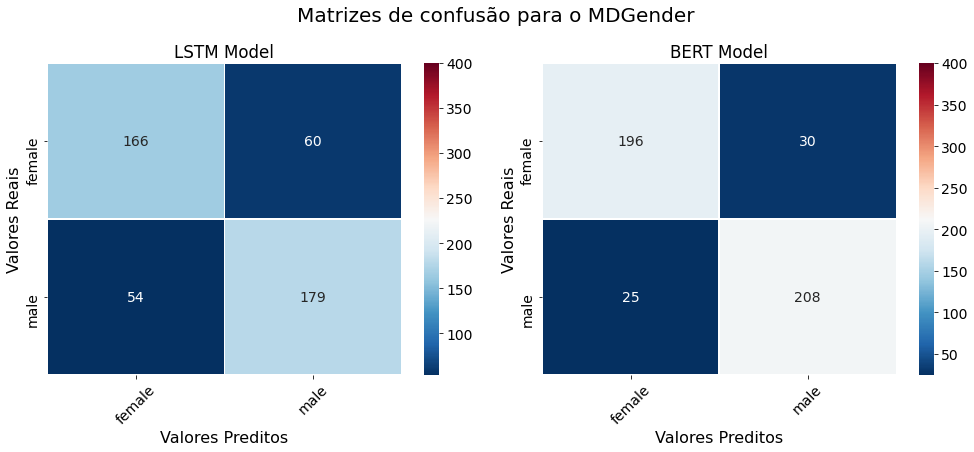

In [ ]:
utils.plot_grid_multilabel_confusion_matrixes(y_true_list=[y_test_lstm_md_gender_coded, y_test_bert_md_gender_coded],
                                              y_pred_list=[y_pred_lstm_md_gender_coded, y_pred_bert_md_gender_coded],
                                              nrows=1,
                                              ncols=2,
                                              figsize=(14, 6),
                                              title='Matrizes de confusão para o MDGender',
                                              subtitles=['LSTM Model', 'BERT Model'],
                                              labels=binary_labels)

### ConvAI2

In [ ]:
idx2convai2 = {index: label for index, label in enumerate(ternary_labels)}

y_test_bert_convai2_coded = model.change_target_codification(y_test_convai2, idx2convai2)
y_pred_bert_convai2_coded = model.change_target_codification(y_pred_bert_convai2, idx2convai2)

y_test_lstm_convai2_coded = model.change_target_codification(y_test_convai2_lstm, idx2convai2)
y_pred_lstm_convai2_coded = model.change_target_codification(y_pred_lstm_convai2, idx2convai2)

(len(y_test_bert_convai2_coded), len(y_test_lstm_convai2_coded)), (len(y_pred_bert_convai2_coded), len(y_pred_lstm_convai2_coded))

((10000, 10000), (10000, 10000))

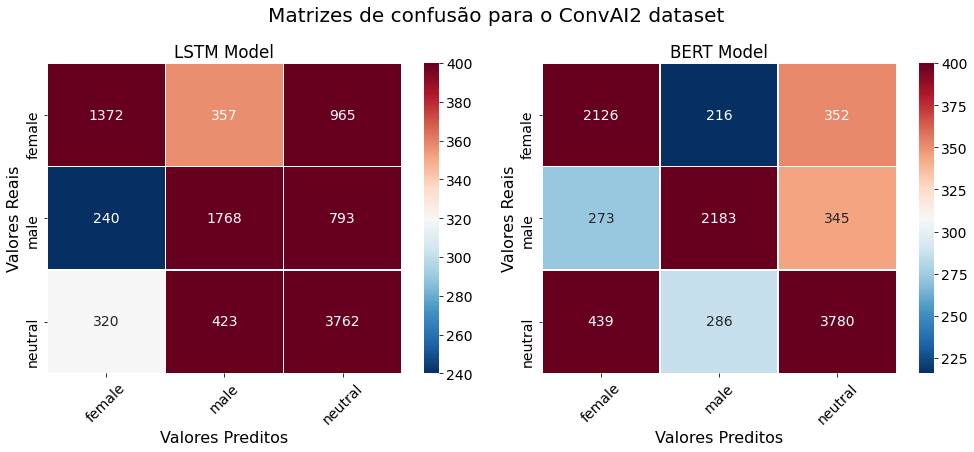

In [ ]:
utils.plot_grid_multilabel_confusion_matrixes(y_true_list=[y_test_lstm_convai2_coded, y_test_bert_convai2_coded],
                                              y_pred_list=[y_pred_lstm_convai2_coded, y_pred_bert_convai2_coded],
                                              nrows=1,
                                              ncols=2,
                                              figsize=(14, 6),
                                              title='Matrizes de confusão para o ConvAI2 dataset',
                                              subtitles=['LSTM Model', 'BERT Model'],
                                              labels=ternary_labels)

### LIGHT

In [ ]:
idx2light = {index: label for index, label in enumerate(ternary_labels)}

y_test_bert_light_coded = model.change_target_codification(y_test_light, idx2light)
y_pred_bert_light_coded = model.change_target_codification(y_pred_bert_light, idx2light)

y_test_lstm_light_coded = model.change_target_codification(y_test_light_lstm, idx2light)
y_pred_lstm_light_coded = model.change_target_codification(y_pred_lstm_light, idx2light)

(len(y_test_bert_light_coded), len(y_test_lstm_light_coded)), (len(y_pred_bert_light_coded), len(y_pred_lstm_light_coded))

((10000, 10000), (10000, 10000))

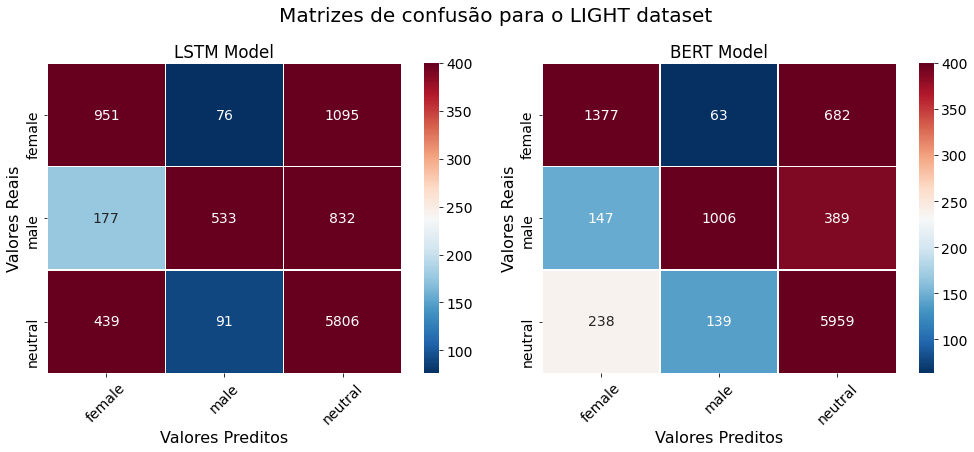

In [ ]:
utils.plot_grid_multilabel_confusion_matrixes(y_true_list=[y_test_lstm_light_coded, y_test_bert_light_coded],
                                              y_pred_list=[y_pred_lstm_light_coded, y_pred_bert_light_coded],
                                              nrows=1,
                                              ncols=2,
                                              figsize=(14, 6),
                                              title='Matrizes de confusão para o LIGHT dataset',
                                              subtitles=['LSTM Model', 'BERT Model'],
                                              labels=ternary_labels)

## Table Reports

### *Wikipedia Toxic Comments*

In [ ]:
print('-------------------------- LSTM -------------------------')
print(classification_report(y_test_toxic_lstm, y_pred_lstm_toxic, target_names=toxic_labels))
print('\n-------------------------- BERT -------------------------')
print(classification_report(y_test_toxic, y_pred_bert_toxic, target_names=toxic_labels))

-------------------------- LSTM -------------------------
               precision    recall  f1-score   support

        toxic       0.81      0.71      0.75       991
 severe_toxic       0.66      0.48      0.56       317
      obscene       0.70      0.77      0.73       716
       threat       0.62      0.54      0.57       114
       insult       0.58      0.64      0.61       684
identity_hate       0.23      0.66      0.34        47

    micro avg       0.67      0.67      0.67      2869
    macro avg       0.60      0.63      0.59      2869
 weighted avg       0.69      0.67      0.68      2869
  samples avg       0.18      0.20      0.19      2869


-------------------------- BERT -------------------------
               precision    recall  f1-score   support

        toxic       0.79      0.77      0.78       991
 severe_toxic       0.43      0.16      0.24       317
      obscene       0.66      0.83      0.74       716
       threat       0.72      0.81      0.76       114

### MD*Gender*

In [ ]:
print('-------------------------- LSTM -------------------------')
print(classification_report(y_test_md_gender_lstm, y_pred_lstm_md_gender, target_names=binary_labels))
print('\n-------------------------- BERT -------------------------')
print(classification_report(y_test_md_gender, y_pred_bert_md_gender, target_names=binary_labels))

-------------------------- LSTM -------------------------
              precision    recall  f1-score   support

      female       0.75      0.73      0.74       226
        male       0.75      0.77      0.76       233

   micro avg       0.75      0.75      0.75       459
   macro avg       0.75      0.75      0.75       459
weighted avg       0.75      0.75      0.75       459
 samples avg       0.75      0.75      0.75       459


-------------------------- BERT -------------------------
              precision    recall  f1-score   support

      female       0.89      0.87      0.88       226
        male       0.87      0.89      0.88       233

   micro avg       0.88      0.88      0.88       459
   macro avg       0.88      0.88      0.88       459
weighted avg       0.88      0.88      0.88       459
 samples avg       0.88      0.88      0.88       459



### ConvAI2

In [ ]:
print('-------------------------- LSTM -------------------------')
print(classification_report(y_test_convai2_lstm, y_pred_lstm_convai2, target_names=ternary_labels))
print('\n-------------------------- BERT -------------------------')
print(classification_report(y_test_convai2, y_pred_bert_convai2, target_names=ternary_labels))

-------------------------- LSTM -------------------------
              precision    recall  f1-score   support

      female       0.71      0.51      0.59      2694
        male       0.69      0.63      0.66      2801
     neutral       0.68      0.84      0.75      4505

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.70      0.66      0.67     10000
weighted avg       0.69      0.69      0.68     10000
 samples avg       0.69      0.69      0.69     10000


-------------------------- BERT -------------------------
              precision    recall  f1-score   support

      female       0.75      0.79      0.77      2694
        male       0.81      0.78      0.80      2801
     neutral       0.84      0.84      0.84      4505

   micro avg       0.81      0.81      0.81     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000
 samples avg       0.81      0.81      0.81     10000



### LIGHT

In [ ]:
print('-------------------------- LSTM -------------------------')
print(classification_report(y_test_light_lstm, y_pred_lstm_light, target_names=ternary_labels))
print('\n-------------------------- BERT -------------------------')
print(classification_report(y_test_light, y_pred_bert_light, target_names=ternary_labels))

-------------------------- LSTM -------------------------
              precision    recall  f1-score   support

      female       0.61      0.45      0.52      2122
        male       0.76      0.35      0.48      1542
     neutral       0.75      0.92      0.83      6336

   micro avg       0.73      0.73      0.73     10000
   macro avg       0.71      0.57      0.61     10000
weighted avg       0.72      0.73      0.71     10000
 samples avg       0.73      0.73      0.73     10000


-------------------------- BERT -------------------------
              precision    recall  f1-score   support

      female       0.78      0.65      0.71      2122
        male       0.83      0.65      0.73      1542
     neutral       0.85      0.94      0.89      6336

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.82      0.75      0.78     10000
weighted avg       0.83      0.83      0.83     10000
 samples avg       0.83      0.83      0.83     10000

